# The Sparks Foundation Internship

# Task-3: To Explore unsupervised machine learning

# Author: Piyush Ashok Lanjewar

Aim : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.cluster import KMeans 
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression

# Importing Data and reading

In [2]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)

# Statistical description of data

In [3]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Determining most suitable number of clusters

In [7]:
sse = {}  #sse:sum of squared errors
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    print(data["clusters"])
    sse[k] = kmeans.inertia_ 

0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Name: clusters, Length: 150, dtype: int32
0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: clusters, Length: 150, dtype: int32
0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    0
147    2
148    2
149    0
Name: clusters, Length: 150, dtype: int32
0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    0
147    2
148    2
149    0
Name: clusters, Length: 150, dtype: int32
0      1
1      1
2      1
3      1
4      1
      ..
145    4
146    0
147    4
148    4
149    0
Name: clusters, Length: 150, dtype: int32
0      0
1      5
2      5
3      5
4      0
      ..
145    2
146    1
147    2
148    2
149    1
Name: clusters, Length: 150, dtype: int32
0      1
1      3
2      3
3      3
4      1
      ..
145    5
146    6
147    5
148    5
149    6
Name: clusters, Length: 150, dtype: int32
0      1
1   

# Visualization of iris data

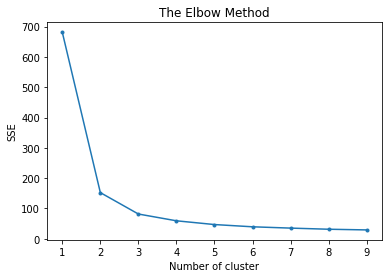

In [8]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), marker='.')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title('The Elbow Method')
plt.show()

In [9]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(data)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 1 2 2 2 0 2 1 0 2 1 2 1 2 1 1 2 1 1 1 1 2
 2 2 2 1 2 1 1 1 1 1 1 2 2 2 1 1 1 2 1 0 1 1 1 2 0 1 2 1 1 1 2 1 1 1 1 1 1
 1 2 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 1 2 2 2 1 1
 2 1]


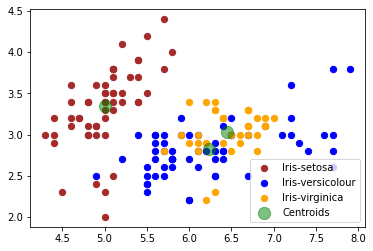

In [11]:

# Visualising the clusters
x = data.iloc[:, [0, 1, 2, 3]].values
centers = kmeans.cluster_centers_

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 40, c = 'brown', label = 'Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=40,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 40, c = 'orange', label = 'Iris-virginica')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=150, alpha=0.5,label='Centroids')
plt.legend()